# YOUSSEF MOHAMED HELMY

# <u> Machine Learning Internship at UneeQInterns -Task 3  [Handwritten Digit Recognition using Deep Learning]</u>

## <i> In This Project , We Build an Artificial Neural Network to classify Handwritten Digit Recognition from 0 to 9 and we apply hyperparamtere tuning to achieve the best possible result </i>

## Import Required Libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import tensorflow as tf                   
from tensorflow.keras import regularizers # type: ignore
sns.set_style("darkgrid")                       

## Loading our Data

In [169]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## Determine The shape of Train and test 

In [170]:
train.shape

(42000, 785)

In [171]:
test.shape

(28000, 784)

## determine the Features and target

In [172]:
# Separate features and labels for training
train_y = train.iloc[:, 0].values  # First column as labels
train_x = train.iloc[:, 1:].values  # Remaining columns as features

# Features for testing (assuming you only have x_test for prediction)
test_x = test.values

# <u> Preprocessing :- </u> 

 ## Normalization 

In [173]:
# Normalize data if needed
train_x = tf.keras.utils.normalize(train_x)
test_x = tf.keras.utils.normalize(test_x)

## <u> Apply Artificial Neural Network :- </u>

## Define The Neural Network 

In [174]:
def create_model(hidden_units=128, learning_rate=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(784,)),
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

## Define hyperparameters grid

In [175]:

param_grid = {
    'hidden_units': [64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1]
}


##  Convert param_grid to list of dictionaries

In [176]:
param_list = list(ParameterGrid(param_grid))
best_accuracy = 0
best_model = None
best_params = None
best_history = None


## Apply Fine_Tune Hyperparamters

In [177]:
# Iterate over each combination of hyperparameters
for params in param_list:
    print(f"Training model with params: {params}")
    
    # Create model with current hyperparameters
    model = create_model(hidden_units=params['hidden_units'], learning_rate=params['learning_rate'])
    
    # Train model
    history=model.fit(train_x, train_y, epochs=10,verbose=0)
    
    # Evaluate model
    _, accuracy = model.evaluate(train_x, train_y,verbose=0)
    print(f"Training Accuracy: {accuracy:.4f}")
    
    # Check if current model is better than previous best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_params = params
# Print best model's parameters and accuracy
print(f"\nBest Model Parameters: {best_params}")
print(f"Best Model Test Accuracy: {best_accuracy:.4f}")

Training model with params: {'hidden_units': 64, 'learning_rate': 0.001}
Training Accuracy: 0.9866
Training model with params: {'hidden_units': 64, 'learning_rate': 0.01}
Training Accuracy: 0.9862
Training model with params: {'hidden_units': 64, 'learning_rate': 0.1}
Training Accuracy: 0.7792
Training model with params: {'hidden_units': 128, 'learning_rate': 0.001}
Training Accuracy: 0.9962
Training model with params: {'hidden_units': 128, 'learning_rate': 0.01}
Training Accuracy: 0.9878
Training model with params: {'hidden_units': 128, 'learning_rate': 0.1}
Training Accuracy: 0.6938
Training model with params: {'hidden_units': 256, 'learning_rate': 0.001}
Training Accuracy: 0.9965
Training model with params: {'hidden_units': 256, 'learning_rate': 0.01}
Training Accuracy: 0.9855
Training model with params: {'hidden_units': 256, 'learning_rate': 0.1}
Training Accuracy: 0.6376

Best Model Parameters: {'hidden_units': 256, 'learning_rate': 0.001}
Best Model Test Accuracy: 0.9965


## Make predictions using the best model

In [178]:
predictions = best_model.predict(test_x)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


##  Visualize predictions

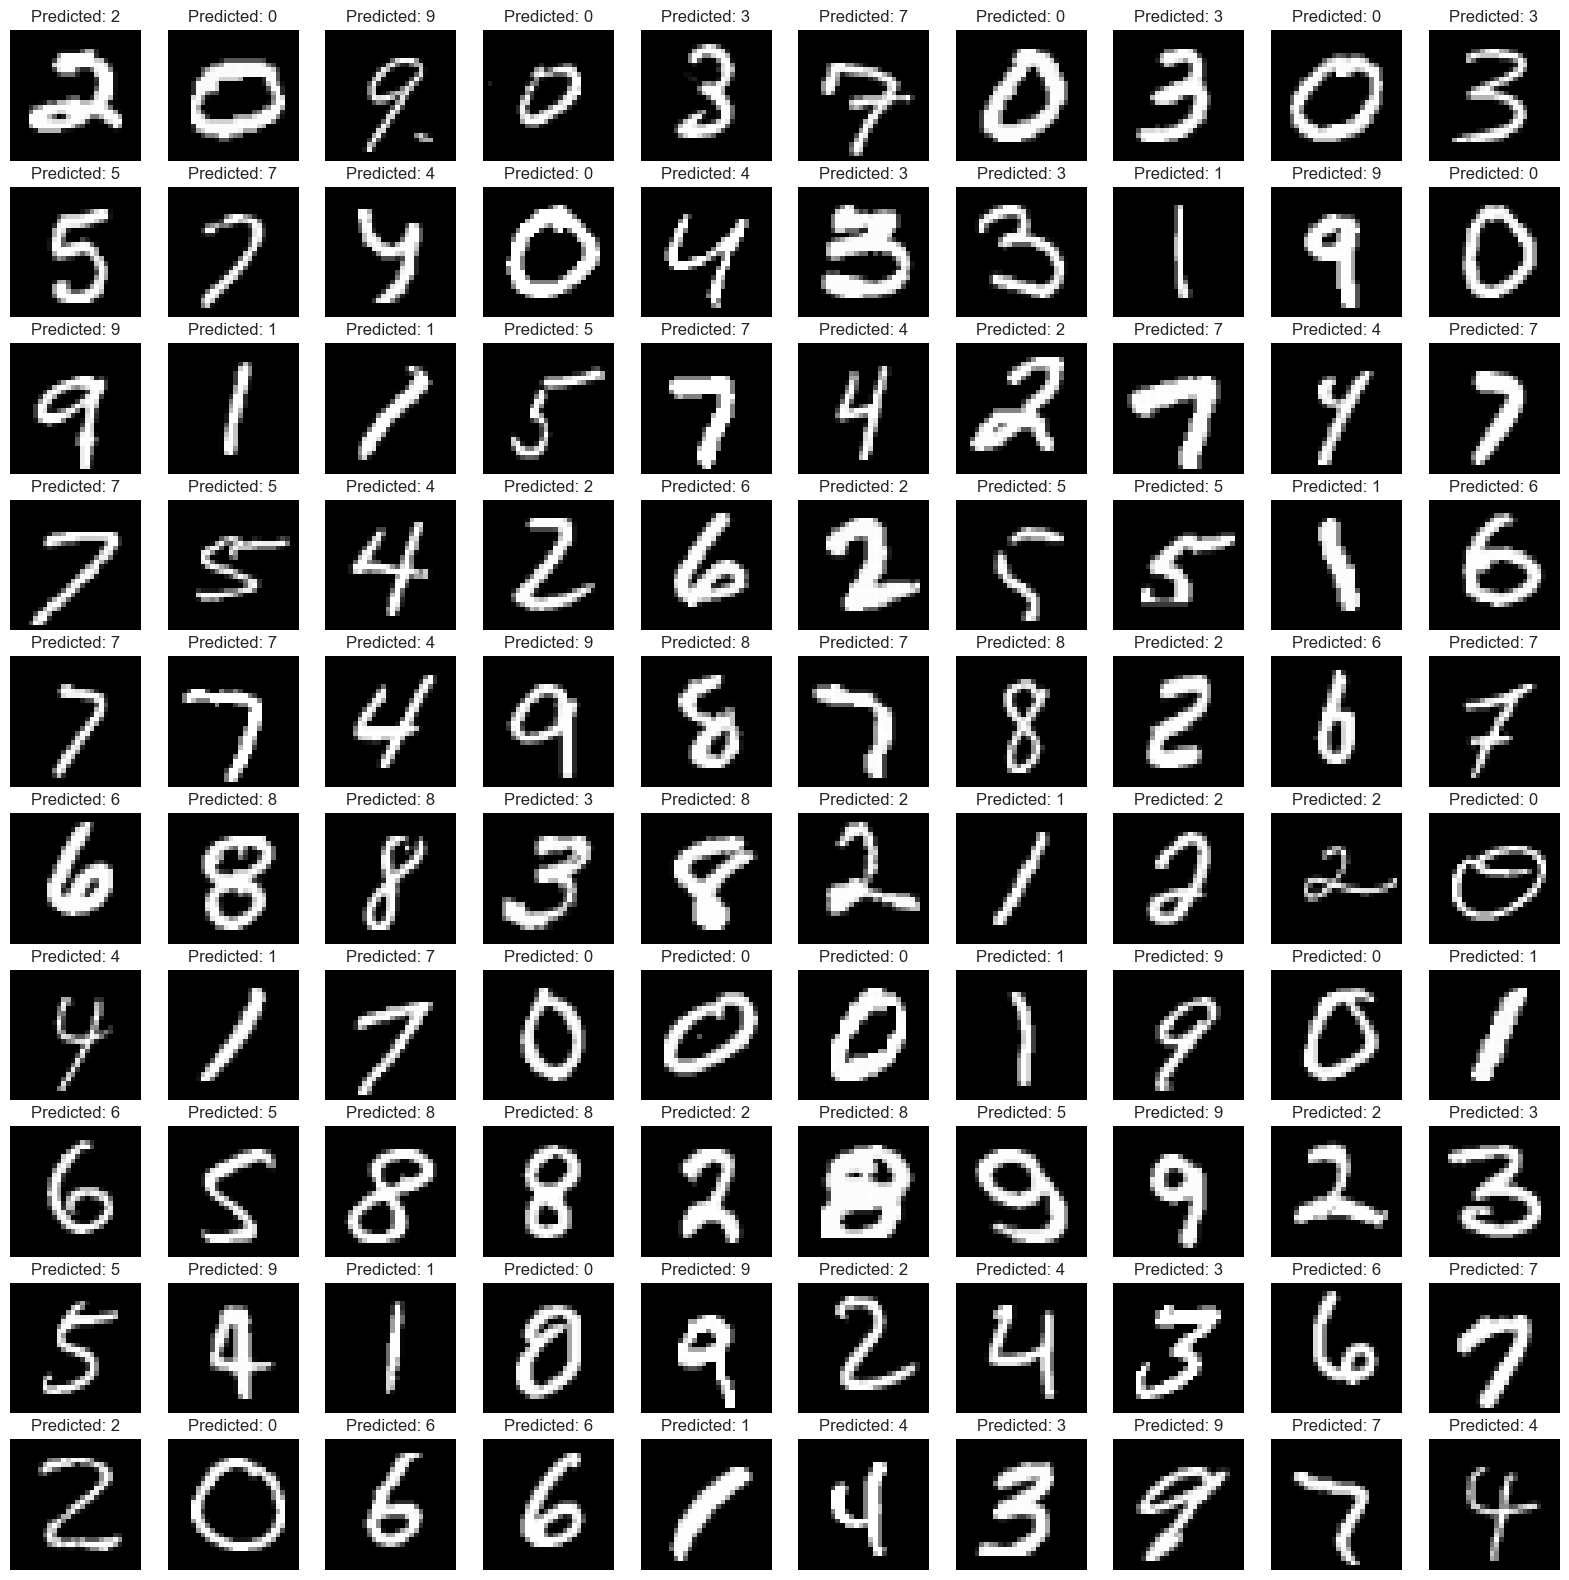

In [180]:
num_rows = 10
num_cols = 10
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.show()